In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("Creditcard_data.csv")

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
#class count

class_0_count, class_1_count = data['Class'].value_counts()

class_1_count


class_0 = data[data['Class']==0]
class_1 = data[data['Class']==1]


print('class 0:', class_0.shape)
print('class 1:', class_1.shape)


class 0: (763, 31)
class 1: (9, 31)


total class of 1 and0: Class
0    9
1    9
Name: count, dtype: int64


<Axes: title={'center': 'count (target)'}, xlabel='Class'>

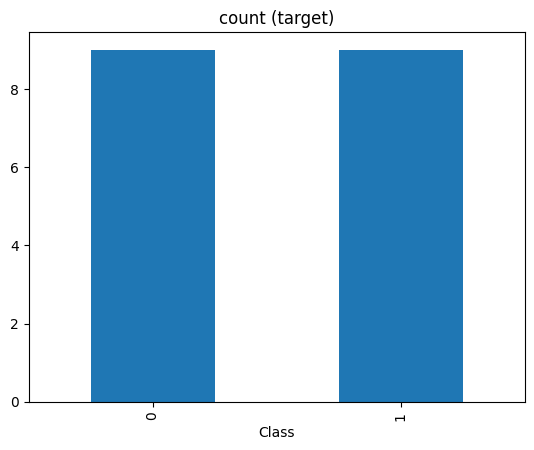

In [3]:
#undersampling

class_0_under = class_0.sample(class_1_count)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",test_under['Class'].value_counts())# plot the count after under-sampeling
test_under['Class'].value_counts().plot(kind='bar', title='count (target)')


total class of 1 and 0: Class
0    9
1    9
Name: count, dtype: int64


<Axes: title={'center': 'count (target)'}, xlabel='Class'>

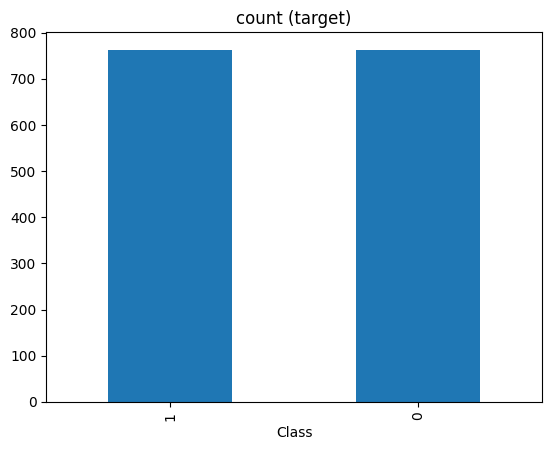

In [4]:
#over-sampling

class_1_over = class_1.sample(class_0_count, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_under['Class'].value_counts())# plot the count after under-sampeling
test_over['Class'].value_counts().plot(kind='bar', title='count (target)')


In [8]:
import imblearn

x = data.drop(columns=["Class"])  # Drop the target column to get the features
y = data["Class"] 

In [12]:
# import library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 763, 1: 9})
Resample dataset shape Counter({0: 9, 1: 9})


In [ ]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variablex_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

In [ ]:
#tomek links
# import library

from imblearn.under_sampling import TomekLinks

tl = RandomOverSampler(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = ros.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

In [13]:
#smote

#synthetic minority oversampling technique



In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [21]:
import pandas as pd
from sklearn.utils import resample


df = pd.read_csv("Creditcard_data.csv")

class_0_count = data[data['Class'] == 0]
class_1_count = data[data['Class'] == 1]

balanced_minority = resample(class_1_count,
                             replace=True,
                             n_samples=len(class_0_count),
                             random_state=42)

balanced_df = pd.concat([class_0_count, balanced_minority])

print(balanced_df['Class'].value_counts())

Class
0    763
1    763
Name: count, dtype: int64


# Simple Random Sampling

In [24]:
simple_random_sample = balanced_df.sample(n=500, random_state=42)

# Stratified Sampling

In [25]:
from sklearn.model_selection import train_test_split

_, stratified_sample = train_test_split(balanced_df,
                                        test_size=500/len(balanced_df),
                                        stratify=balanced_df['Class'],
                                        random_state=42)

# Systematic Sampling

In [27]:
import numpy as np

step = len(balanced_df) // 500
systematic_sample = balanced_df.iloc[::step, :]


# Cluster Sampling

In [28]:
import numpy as np


bins = [0, 50, 100, 200, 500, np.inf]
label = [0, 1, 2, 3, 4]
df['Cluster'] = pd.cut(df['Amount'], bins=bins, labels=labels)
print(df['Cluster'].value_counts())
np.random.seed(42)
df['Cluster'] = np.random.randint(0, 5, size=len(df))
print(df['Cluster'].value_counts())
selected_clusters = np.random.choice(df['Cluster'].unique(), size=2, replace=False)
cluster_sample = df[df['Cluster'].isin(selected_clusters)]

print(cluster_sample.head())

Cluster
0    560
1     99
2     51
3     34
4     23
Name: count, dtype: int64
Cluster
0    163
3    162
4    160
1    146
2    141
Name: count, dtype: int64
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
6     4  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7     7 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8     7 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   

         V8        V9  ...       V22       V23       V24       V25       V26  \
0  0.098698  0.363787  ...  0.277838 -0.110474  0.066928  0.128539 -0.189115   
2  0.247676 -1.514654  ...  0.771679  0.909412 -0.689281 -0.327642 -0.139097   
6  0.081213  0.464960  ... -0.270710 -0.154104 -0.780055  0.750137 -0.257237   
7 -3.807864  0.615375  ... -1.01545

# Bootstrap Sampling

In [29]:
bootstrap_sample = balanced_df.sample(n=500, replace=True, random_state=42)

# Evaluate Sampling Techniques on Diverse ML Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='rbf', random_state=42)
}

sampling_methods = {
    "Simple Random": simple_random_sample,
    "Stratified": stratified_sample,
    "Systematic": systematic_sample,
    "Cluster": cluster_sample,
    "Bootstrap": bootstrap_sample
}

results = {}

for sampling_name, sample in sampling_methods.items():
    x = sample.drop(columns = ['Class'])
    y = sample['Class']
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
    for model_name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        results[(sampling_name, model_name)] = acc

for (sampling, model), accuracy in results.items():
    print(f"Sampling: {sampling}, Model: {model}, Accuracy: {accuracy:.2f}")



# undersampling

In [34]:



from sklearn.utils import resample

undersampled_majority = resample(
    class_0_count,
    replace=False,
    n_samples=len(class_1_count),
    random_state=42
)


undersampled_df = pd.concat([undersampled_majority, class_1_count])

print(undersampled_df['Class'].value_counts())

Class
0    9
1    9
Name: count, dtype: int64


In [35]:
# Simple Random Sampling

sample_size = min(100, len(undersampled_df))
simple_random_sample = undersampled_df.sample(n=sample_size, random_state=42)


# Stratified Sampling
from sklearn.model_selection import train_test_split

dataset_size = len(undersampled_df)

if dataset_size > 100:
    test_size = 100 / dataset_size
else:
    test_size = max(1, dataset_size - 1)


try:
    _, stratified_sample = train_test_split(
        undersampled_df,
        test_size=test_size,
        stratify=undersampled_df['Class'],
        random_state=42
    )
    print(f"Stratified Sample Size: {len(stratified_sample)}")
except ValueError as e:
    print(f"Error during stratified sampling: {e}")

print(f"Stratified Sample Size: {len(stratified_sample)}")
dataset_size = len(undersampled_df)
step = max(1, dataset_size // 100)


try:
    systematic_sample = undersampled_df.iloc[::step, :]
    print(f"Systematic Sample Size: {len(systematic_sample)}")
except Exception as e:
    print(f"Error during systematic sampling: {e}")


import numpy as np
np.random.seed(42)
undersampled_df['Cluster'] = np.random.randint(0, 5, size=len(undersampled_df))
selected_clusters = np.random.choice(undersampled_df['Cluster'].unique(), size=2, replace=False)
cluster_sample = undersampled_df[undersampled_df['Cluster'].isin(selected_clusters)]


bootstrap_sample = undersampled_df.sample(n=100, replace=True, random_state=42)


sampling_methods = {
    "Simple Random": simple_random_sample,
    "Stratified": stratified_sample,
    "Systematic": systematic_sample,
    "Cluster": cluster_sample,
    "Bootstrap": bootstrap_sample
}

Error during stratified sampling: The train_size = 1 should be greater or equal to the number of classes = 2
Stratified Sample Size: 501
Systematic Sample Size: 18


In [36]:
sampling_methods = {
    "Simple Random": simple_random_sample,
    "Stratified": stratified_sample,
    "Systematic": systematic_sample,
    "Cluster": cluster_sample,
    "Bootstrap": bootstrap_sample
}
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='rbf', random_state=42)
}


results = {}


for sampling_name, sample in sampling_methods.items():
    X = sample.drop(columns=['Class', 'Cluster'], errors='ignore')
    y = sample['Class']

    for model_name, model in models.items():
        model.fit(X, y)
        y_pred = model.predict(X)
        acc = accuracy_score(y, y_pred)
        results[(sampling_name, model_name)] = acc
import pandas as pd
from tabulate import tabulate

results_df = pd.DataFrame(
    [
        {"Sampling Method": sampling, "Model": model, "Accuracy": accuracy}
        for (sampling, model), accuracy in results.items()
    ]
)

C:\Users\India\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
